<a href="https://colab.research.google.com/github/Ishq01/cs562/blob/main/562_Result_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("results_with_baseline.csv")

# Extract final-epoch results
final = df[df["epoch"] == df["epochs_total"]]

Plot 1 — EM/F1 vs Epoch (per σ, per C)

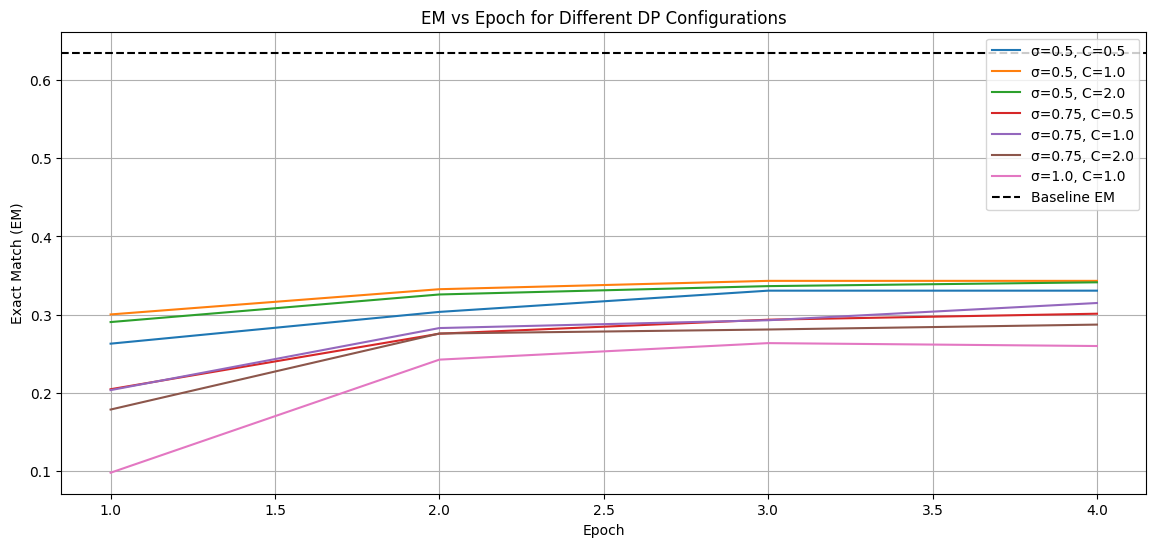

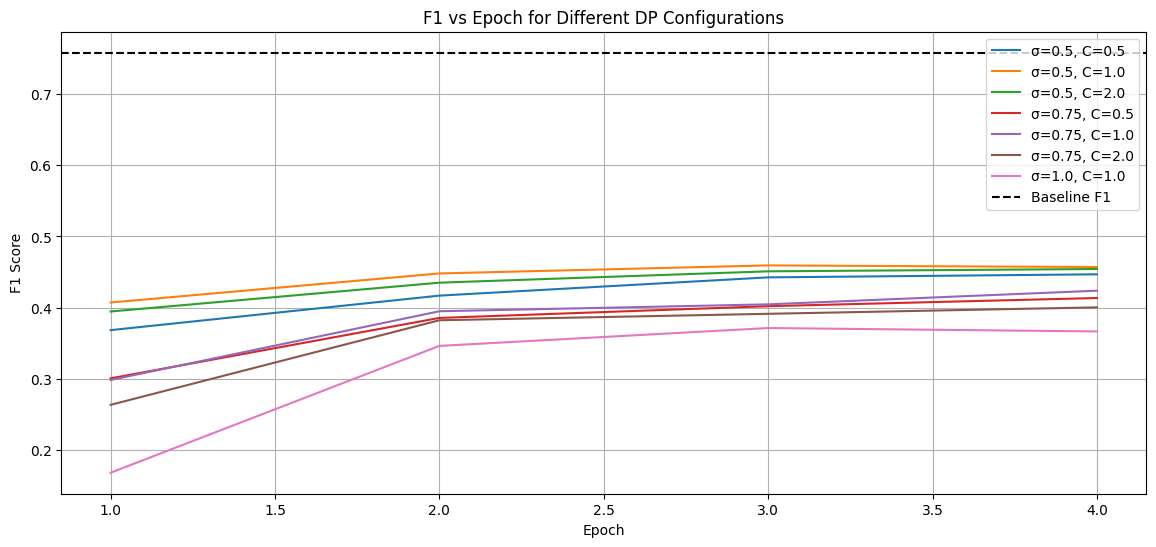

In [ ]:
def plot_em_f1_vs_epoch(df):
    configs = df.groupby(["sigma", "C"])

    plt.figure(figsize=(14, 6))

    for (sigma, C), group in configs:
        plt.plot(group["epoch"], group["em"], label=f"σ={sigma}, C={C}")

    plt.axhline(0.6347, color="black", linestyle="--", label="Baseline EM")
    plt.title("EM vs Epoch for Different DP Configurations")
    plt.xlabel("Epoch")
    plt.ylabel("Exact Match (EM)")
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(14, 6))
    for (sigma, C), group in configs:
        plt.plot(group["epoch"], group["f1"], label=f"σ={sigma}, C={C}")

    plt.axhline(0.7578, color="black", linestyle="--", label="Baseline F1")
    plt.title("F1 vs Epoch for Different DP Configurations")
    plt.xlabel("Epoch")
    plt.ylabel("F1 Score")
    plt.legend()
    plt.grid()
    plt.show()

plot_em_f1_vs_epoch(df)


Plot 2 — EM vs ε (privacy–utility curve)

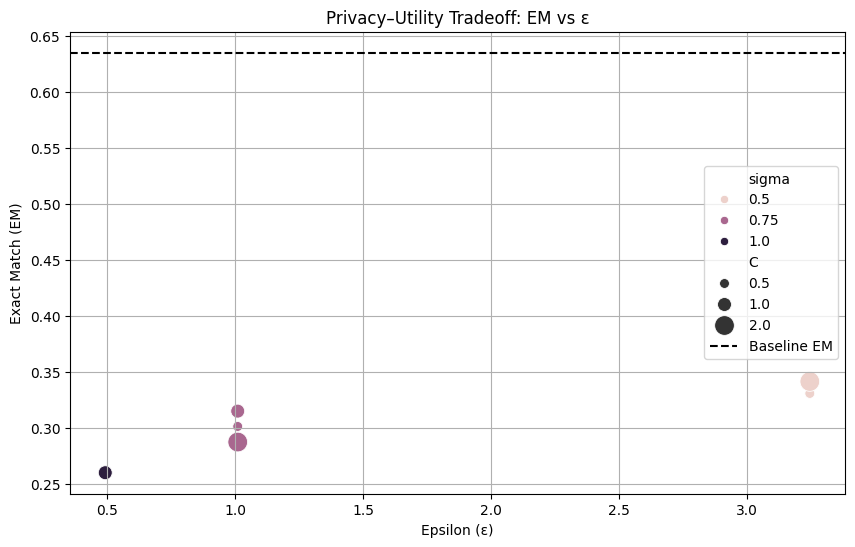

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final, x="epsilon", y="em", hue="sigma", size="C", sizes=(50, 200))
plt.axhline(0.6347, linestyle="--", color="black", label="Baseline EM")
plt.title("Privacy–Utility Tradeoff: EM vs ε")
plt.xlabel("Epsilon (ε)")
plt.ylabel("Exact Match (EM)")
plt.legend()
plt.grid()
plt.show()

Plot 2 — Frontier Curve - EM vs ε (privacy–utility curve)

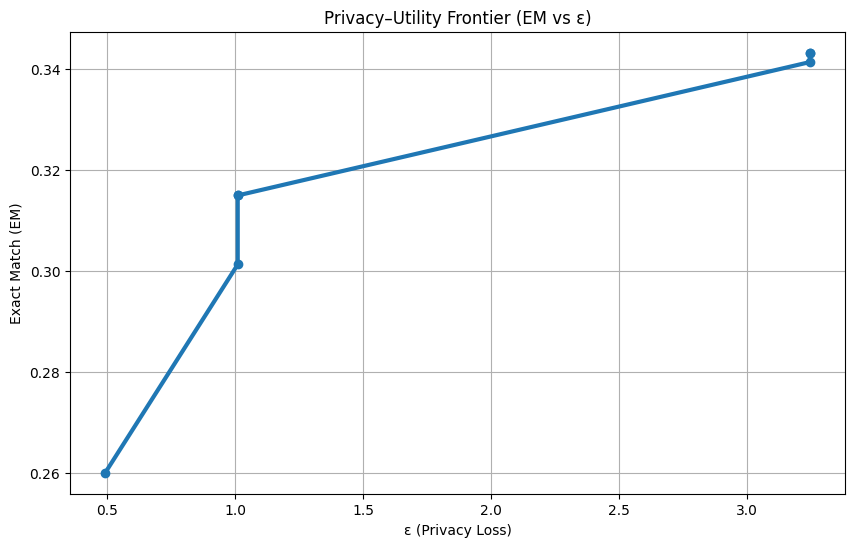

In [ ]:
final = df[df["epoch"] == df["epochs_total"]].dropna(subset=["epsilon"])

# Sort by epsilon (lower privacy loss → stronger privacy)
sorted_df = final.sort_values("epsilon")

# Compute frontier: cumulative max EM when moving from low ε to high ε
sorted_df["em_frontier"] = sorted_df["em"].cummax()

plt.figure(figsize=(10, 6))
plt.plot(sorted_df["epsilon"], sorted_df["em_frontier"], marker="o", linewidth=3)
plt.title("Privacy–Utility Frontier (EM vs ε)")
plt.xlabel("ε (Privacy Loss)")
plt.ylabel("Exact Match (EM)")
plt.grid()
plt.show()


Plot 2 — Gradient Line Curve - EM vs ε (privacy–utility curve)

                    run_id        timestamp  sigma    C  batch_size  \
31     sigma1_C1.0_bs8_ep4  20251210-213306   1.00  1.0           8   
19  sigma0.75_C0.5_bs8_ep4  20251210-143001   0.75  0.5           8   
23  sigma0.75_C1.0_bs8_ep4  20251210-171428   0.75  1.0           8   
27  sigma0.75_C2.0_bs8_ep4  20251210-213306   0.75  2.0           8   
15   sigma0.5_C2.0_bs8_ep4  20251210-114533   0.50  2.0           8   
11   sigma0.5_C1.0_bs8_ep4  20251209-040757   0.50  1.0           8   
7    sigma0.5_C0.5_bs8_ep4  20251209-012312   0.50  0.5           8   
3                 baseline         20251210    NaN  NaN           8   

    epochs_total  epoch  avg_loss   epsilon        em        f1       lr  \
31             4      4  3.003859  0.491591  0.259972  0.366788  0.00003   
19             4      4  2.773977  1.009455  0.301252  0.413681  0.00003   
23             4      4  2.672365  1.009455  0.314935  0.423958  0.00003   
27             4      4  2.796559  1.009455  0.287338  0

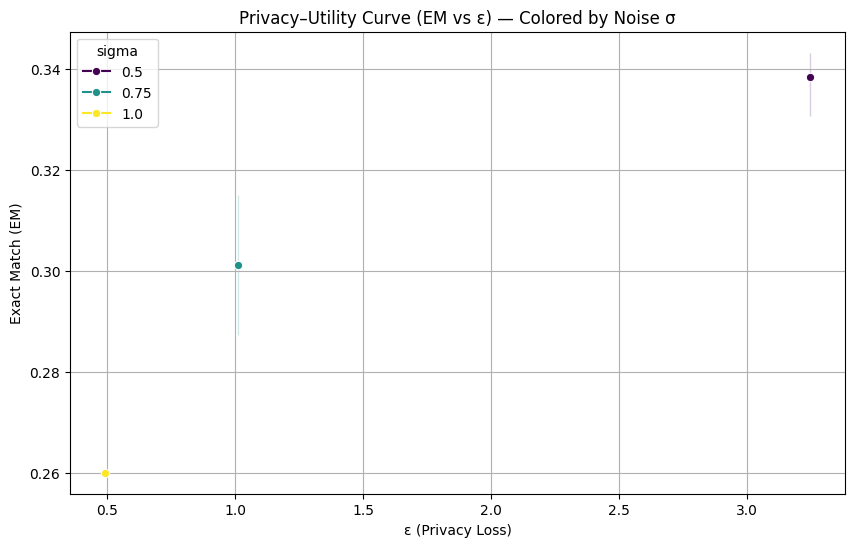

In [ ]:
final_sorted = final.sort_values("epsilon")
print(final_sorted)

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=final_sorted,
    x="epsilon",
    y="em",
    hue="sigma",
    palette="viridis",
    marker="o"
)

plt.title("Privacy–Utility Curve (EM vs ε) — Colored by Noise σ")
plt.xlabel("ε (Privacy Loss)")
plt.ylabel("Exact Match (EM)")
plt.grid()
plt.show()

Dual-Axis Privacy & Accuracy Curve

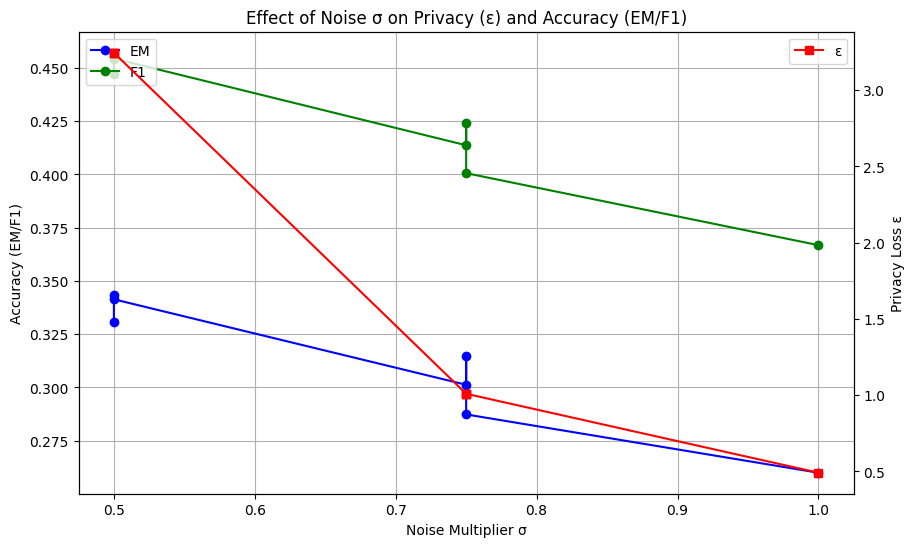

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Sort by sigma or epsilon
sorted_df = final.sort_values("sigma")

ax1.plot(sorted_df["sigma"], sorted_df["em"], marker="o", label="EM", color="blue")
ax1.plot(sorted_df["sigma"], sorted_df["f1"], marker="o", label="F1", color="green")
ax1.set_xlabel("Noise Multiplier σ")
ax1.set_ylabel("Accuracy (EM/F1)")
ax1.legend(loc="upper left")
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(sorted_df["sigma"], sorted_df["epsilon"], marker="s", color="red", label="ε")
ax2.set_ylabel("Privacy Loss ε")
ax2.legend(loc="upper right")

plt.title("Effect of Noise σ on Privacy (ε) and Accuracy (EM/F1)")
plt.show()


my visualization

/tmp/ipython-input-1839523500.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_df["sigma"] = dp_df["sigma"].astype(float)
/tmp/ipython-input-1839523500.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_df["C"] = dp_df["C"].astype(float)


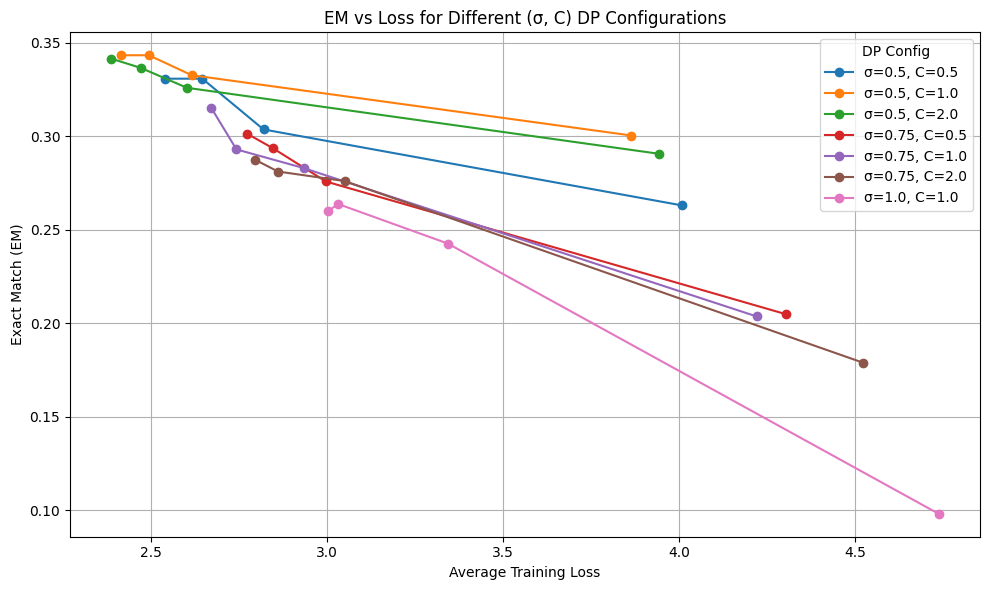

In [ ]:
# Keep only DP runs (baseline has sigma/C as NaN/None)
dp_df = df.dropna(subset=["sigma", "C", "avg_loss", "em"])

# Optional: make sure types are correct
dp_df["sigma"] = dp_df["sigma"].astype(float)
dp_df["C"] = dp_df["C"].astype(float)

# Create the plot
plt.figure(figsize=(10, 6))

for (sigma, C), group in dp_df.groupby(["sigma", "C"]):
    # Sort by loss so the line is not zig-zaggy
    group_sorted = group.sort_values("avg_loss")

    plt.plot(
        group_sorted["avg_loss"],
        group_sorted["em"],
        marker="o",
        label=f"σ={sigma}, C={C}"
    )

plt.xlabel("Average Training Loss")
plt.ylabel("Exact Match (EM)")
plt.title("EM vs Loss for Different (σ, C) DP Configurations")
plt.grid(True)
plt.legend(title="DP Config")
plt.tight_layout()
plt.show()


Plot 3 — F1 vs ε

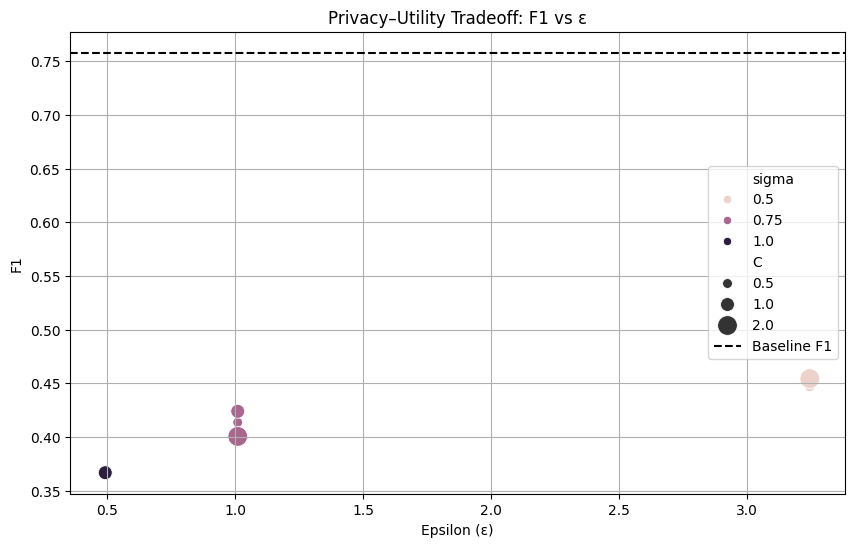

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final, x="epsilon", y="f1", hue="sigma", size="C", sizes=(50, 200))
plt.axhline(0.7578, linestyle="--", color="black", label="Baseline F1")
plt.title("Privacy–Utility Tradeoff: F1 vs ε")
plt.xlabel("Epsilon (ε)")
plt.ylabel("F1")
plt.legend()
plt.grid()
plt.show()


Plot 3 — Frontier Curve - F1 vs ε (privacy–utility curve)

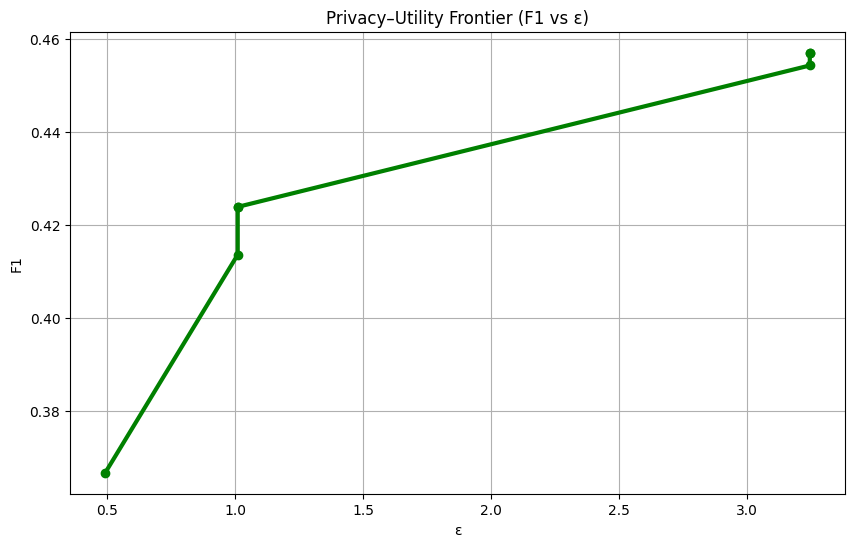

In [ ]:
sorted_df["f1_frontier"] = sorted_df["f1"].cummax()
plt.figure(figsize=(10, 6))
plt.plot(sorted_df["epsilon"], sorted_df["f1_frontier"], marker="o", linewidth=3, color='green')
plt.title("Privacy–Utility Frontier (F1 vs ε)")
plt.xlabel("ε")
plt.ylabel("F1")
plt.grid()
plt.show()

my visualization

/tmp/ipython-input-2087971726.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_df["sigma"] = dp_df["sigma"].astype(float)
/tmp/ipython-input-2087971726.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_df["C"] = dp_df["C"].astype(float)


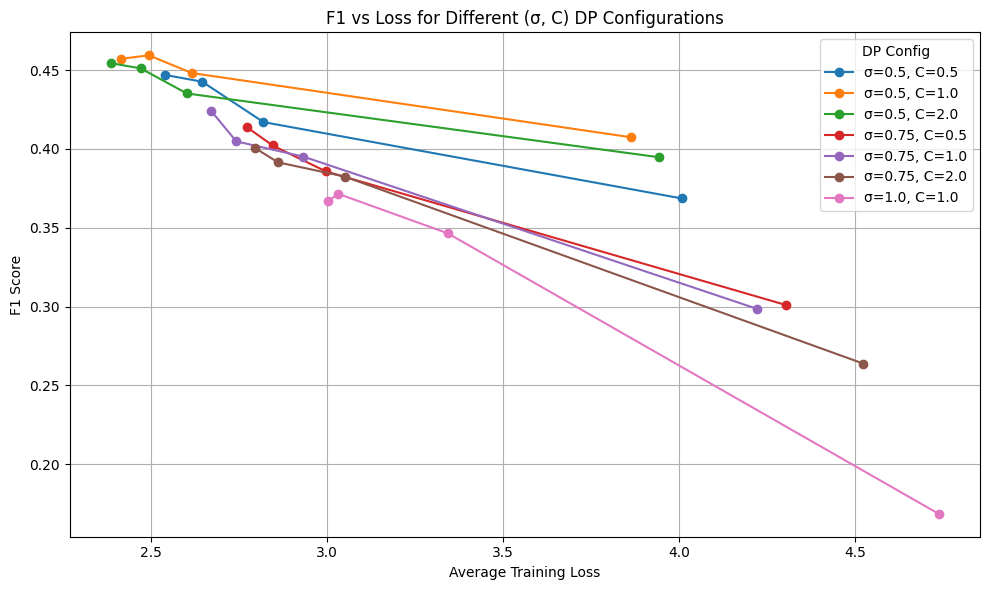

In [ ]:
# Keep only DP rows (baseline has missing sigma/C)
dp_df = df.dropna(subset=["sigma", "C", "avg_loss", "f1"])

# Ensure proper numeric types
dp_df["sigma"] = dp_df["sigma"].astype(float)
dp_df["C"] = dp_df["C"].astype(float)

# Create the plot
plt.figure(figsize=(10, 6))

for (sigma, C), group in dp_df.groupby(["sigma", "C"]):
    group_sorted = group.sort_values("avg_loss")  # to make lines smooth

    plt.plot(
        group_sorted["avg_loss"],
        group_sorted["f1"],
        marker="o",
        label=f"σ={sigma}, C={C}"
    )

plt.xlabel("Average Training Loss")
plt.ylabel("F1 Score")
plt.title("F1 vs Loss for Different (σ, C) DP Configurations")
plt.grid(True)
plt.legend(title="DP Config")
plt.tight_layout()
plt.show()


resetting final

In [ ]:
final = df[df["epoch"] == df["epochs_total"]]

Plot 4 — Heatmap of EM for (σ, C)

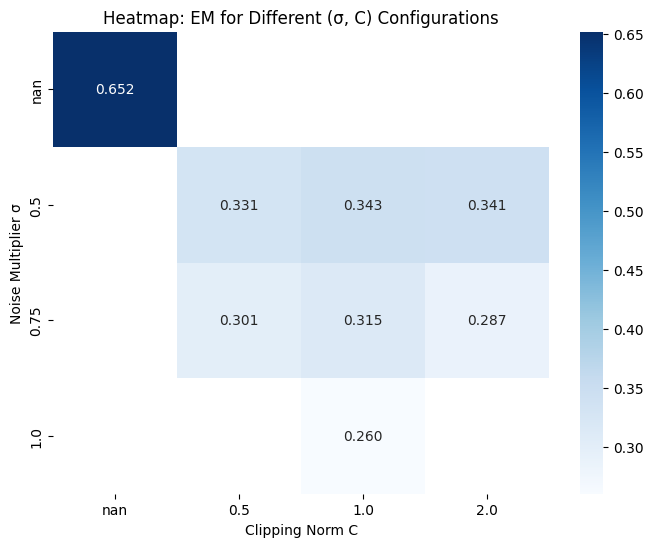

In [ ]:
pivot_em = final.pivot(index="sigma", columns="C", values="em")

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_em, annot=True, cmap="Blues", fmt=".3f")
plt.title("Heatmap: EM for Different (σ, C) Configurations")
plt.xlabel("Clipping Norm C")
plt.ylabel("Noise Multiplier σ")
plt.show()


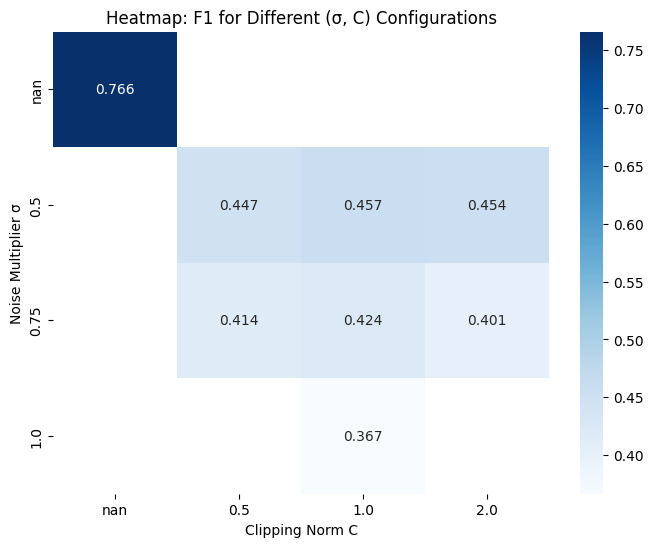

In [ ]:
pivot_em = final.pivot(index="sigma", columns="C", values="f1")

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_em, annot=True, cmap="Blues", fmt=".3f")
plt.title("Heatmap: F1 for Different (σ, C) Configurations")
plt.xlabel("Clipping Norm C")
plt.ylabel("Noise Multiplier σ")
plt.show()

Plot 5 — ε vs Epoch

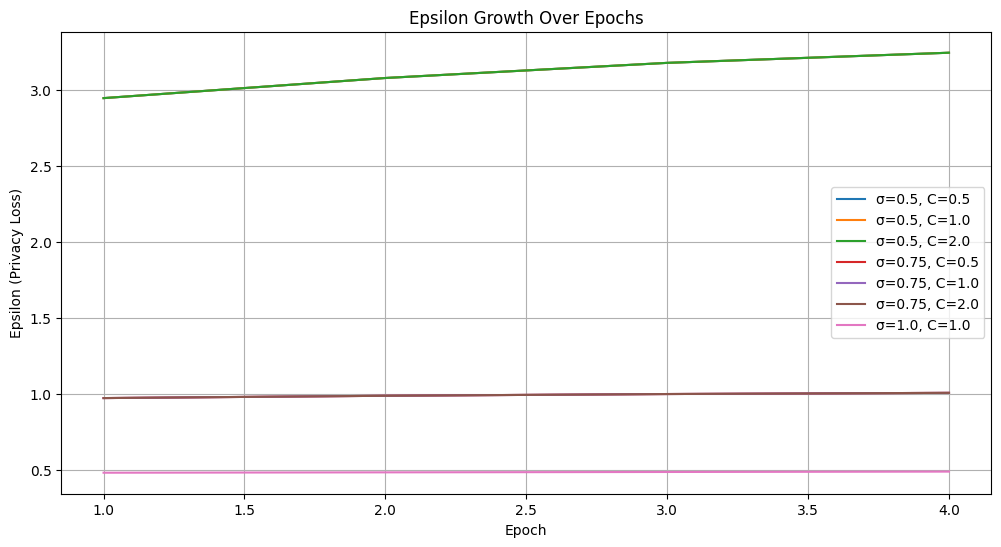

In [ ]:
plt.figure(figsize=(12,6))
for (sigma, C), group in df.groupby(["sigma", "C"]):
    plt.plot(group["epoch"], group["epsilon"], label=f"σ={sigma}, C={C}")

plt.title("Epsilon Growth Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Epsilon (Privacy Loss)")
plt.legend()
plt.grid()
plt.show()


Plot 6 — Accuracy Drop from Baseline

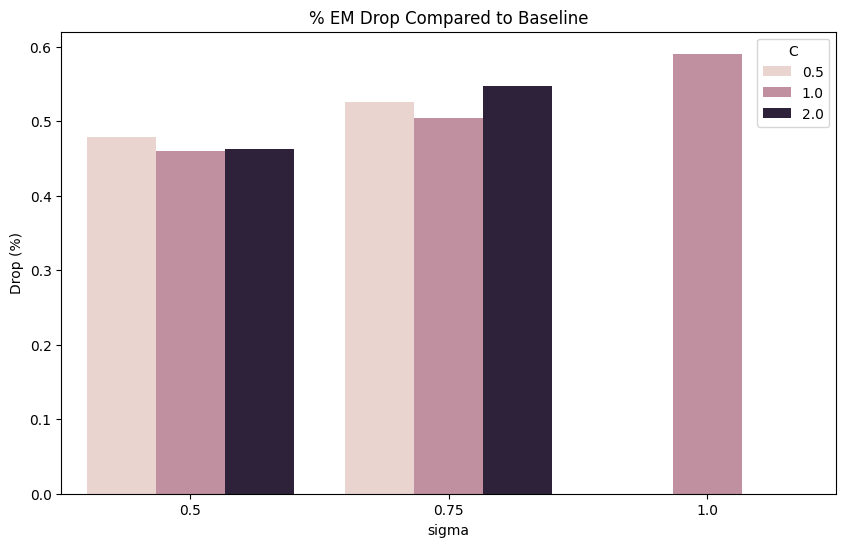

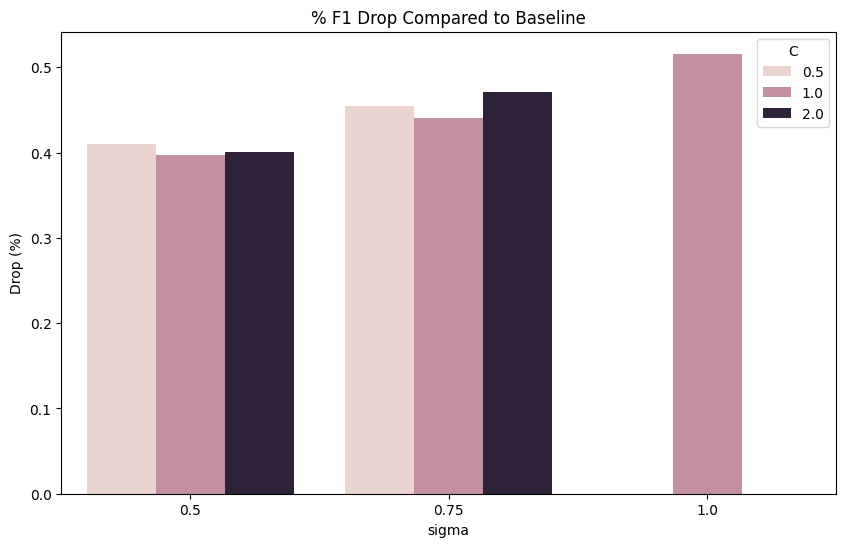

In [ ]:
baseline_em = 0.6347
baseline_f1 = 0.7578

final["em_drop"] = (baseline_em - final["em"]) / baseline_em
final["f1_drop"] = (baseline_f1 - final["f1"]) / baseline_f1

plt.figure(figsize=(10,6))
sns.barplot(data=final, x="sigma", y="em_drop", hue="C")
plt.title("% EM Drop Compared to Baseline")
plt.ylabel("Drop (%)")
plt.show()


plt.figure(figsize=(10,6))
sns.barplot(data=final, x="sigma", y="f1_drop", hue="C")
plt.title("% F1 Drop Compared to Baseline")
plt.ylabel("Drop (%)")
plt.show()


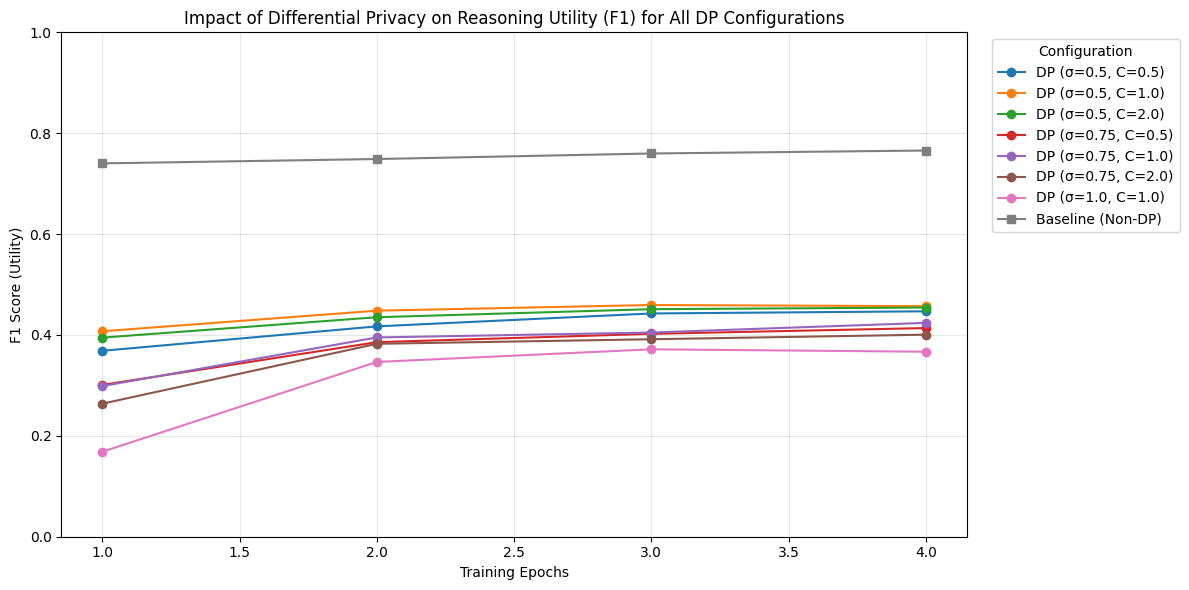

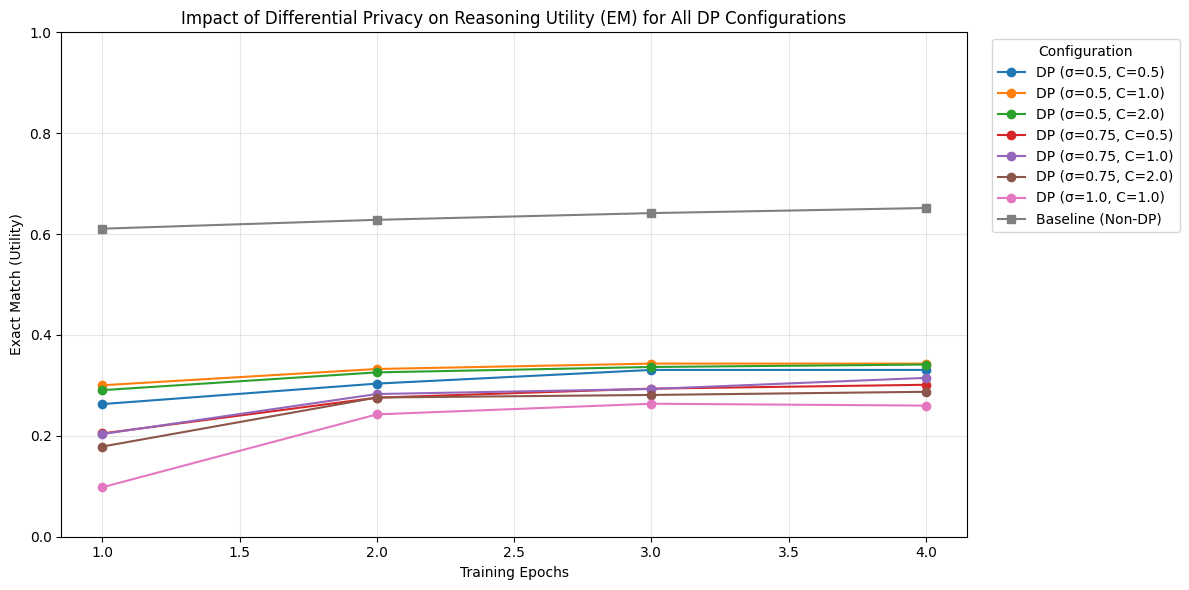

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# Load data
# ---------------------------------------------------------
df = pd.read_csv("results_with_baseline.csv")

# Baseline rows (non-DP)
baseline = df[df["run_id"] == "baseline"].sort_values("epoch")

# DP rows (have sigma and C)
dp_df = df[df["run_id"] != "baseline"].dropna(subset=["sigma", "C"])
dp_df["sigma"] = dp_df["sigma"].astype(float)
dp_df["C"] = dp_df["C"].astype(float)


def plot_metric_all(metric: str, pretty_name: str, title_suffix: str):
    """
    metric: 'f1' or 'em'
    pretty_name: y-axis label, e.g. 'F1 Score (Utility)'
    title_suffix: used in the plot title
    """
    plt.figure(figsize=(12, 6))

    # Plot each DP configuration: one line per (sigma, C)
    for (sigma, C), group in dp_df.groupby(["sigma", "C"]):
        group_sorted = group.sort_values("epoch")

        plt.plot(
            group_sorted["epoch"],
            group_sorted[metric],
            marker="o",
            linestyle="-",
            label=f"DP (σ={sigma}, C={C})"
        )

    # Plot baseline
    if not baseline.empty:
        plt.plot(
            baseline["epoch"],
            baseline[metric],
            marker="s",
            linestyle="-",
            label="Baseline (Non-DP)"
        )

    plt.title(f"Impact of Differential Privacy on {title_suffix}")
    plt.xlabel("Training Epochs")
    plt.ylabel(pretty_name)
    plt.ylim(0.0, 1.0)
    plt.grid(True, alpha=0.3)
    plt.legend(title="Configuration", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()


# ---------------------------------------------------------
# F1 plot (all configs)
# ---------------------------------------------------------
plot_metric_all(
    metric="f1",
    pretty_name="F1 Score (Utility)",
    title_suffix="Reasoning Utility (F1) for All DP Configurations"
)

# ---------------------------------------------------------
# EM plot (all configs)
# ---------------------------------------------------------
plot_metric_all(
    metric="em",
    pretty_name="Exact Match (Utility)",
    title_suffix="Reasoning Utility (EM) for All DP Configurations"
)
